Import des bibliothèques

In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Lecture des 3 fichiers: Coupon.csv, Order.csv et Product.csv

In [257]:
coupon=pd.read_csv('Coupon.csv')
coupon.info()
coupon.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21050 entries, 0 to 21049
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   orderId     21050 non-null  int64
 1   couponUsed  21050 non-null  int64
dtypes: int64(2)
memory usage: 329.0 KB


,orderId,couponUsed
0,219193,1
1,219198,1
2,219207,1
3,219217,1
4,219219,1


In [258]:
#Il faut spécifier que le séparteur est ; afin de lire correctement le fichier 'Order.csv'
order=pd.read_csv('Order.csv',sep=';')
order.info()
order.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96778 entries, 0 to 96777
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   orderId        96778 non-null  int64  
 1   sellerId       96778 non-null  object 
 2   buyerId        96778 non-null  object 
 3   createdAt      96778 non-null  object 
 4   amount         96778 non-null  float64
 5   status         96778 non-null  object 
 6   shippingPrice  96778 non-null  float64
 7   fees           96778 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 5.9+ MB


,orderId,sellerId,buyerId,createdAt,amount,status,shippingPrice,fees
0,217004,Mn2N2xcmAyWmaE7GbArCXm8yzq93,E6RXNgSXZ9M2VJIb55iNyOKC6M63,01/07/2022 00:14,24.99,SELLER_PAID,2.59,1.55
1,217005,36bjCSM2xSZ4I99JAaOczQoZbG2,arOIR4GP6aSpt81L8REeRI0YOz73,01/07/2022 01:04,13.50,SELLER_PAID,2.59,1.03
2,217006,hZyfUaSzZEdDdxheLGJjab0z97r2,Y1urr9H8ttNXZi01EpvrfsZxK7D2,01/07/2022 01:39,10.12,SELLER_PAID,2.99,1.06
3,217008,wzWA5St34wPM7rOiuD8GSPmw1g73,kRLFglBn9odXKwIEHRXSRAmRJ1l1,01/07/2022 02:22,31.00,SELLER_PAID,2.59,1.45
4,217010,FIWW5NyvdpVpWKAyZaznWgWgvb03,FCp6t2GsNSaxVsWB0kgAylDUWDP2,01/07/2022 02:38,12.80,SELLER_PAID,2.99,0.89


In [259]:
#Il faut spécifier que le séparteur est ; afin de lire correctement le fichier 'Product.csv'
product=pd.read_csv('Product.csv',sep=';')
product.info()
product.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171403 entries, 0 to 171402
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   productId      171403 non-null  int64 
 1   orderId        171403 non-null  int64 
 2   category       171403 non-null  object
 3   macroCategory  171360 non-null  object
dtypes: int64(2), object(2)
memory usage: 5.2+ MB


,productId,orderId,category,macroCategory
0,1359,228515,Pots,Childcare
1,1713,227948,Accessoires maternité,Clothing
2,3843,243603,Pyjamas & Vêtements de nuit (fille),Clothing
3,4427,297805,Porteurs,Childcare
4,7300,269071,Pyjamas & vêtements de nuit (garçon),Clothing


Investiguer s'il ya des valeurs nulles et les remplacer par des valeurs plus significatives

In [260]:
print(product.isna().sum().sort_values(ascending=False))
#Remplacer les valeurs nulles des macrocatégories par la valeur 'not specified'
product.fillna({'macroCategory': 'Not specified'}, inplace=True)
print('\n\n')
print(coupon.isna().sum().sort_values(ascending=False))
print('\n\n')
print(product.isna().sum().sort_values(ascending=False))

macroCategory    43
productId         0
orderId           0
category          0
dtype: int64



orderId       0
couponUsed    0
dtype: int64



productId        0
orderId          0
category         0
macroCategory    0
dtype: int64


Voir s'il ya des lignes dupliquées 

In [261]:
coupon.duplicated(subset=None, keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
21045    False
21046    False
21047    False
21048    False
21049    False
Length: 21050, dtype: bool

In [262]:
product.duplicated(subset=None, keep='first')

0         False
1         False
2         False
3         False
4         False
          ...  
171398    False
171399    False
171400    False
171401    False
171402    False
Length: 171403, dtype: bool

In [263]:
order.duplicated(subset=None, keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
96773    False
96774    False
96775    False
96776    False
96777    False
Length: 96778, dtype: bool

Convertir la colonne CreatedAt en format Datetime 

In [264]:
order['createdAt']=pd.to_datetime(order['createdAt'], dayfirst=True)
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96778 entries, 0 to 96777
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   orderId        96778 non-null  int64         
 1   sellerId       96778 non-null  object        
 2   buyerId        96778 non-null  object        
 3   createdAt      96778 non-null  datetime64[ns]
 4   amount         96778 non-null  float64       
 5   status         96778 non-null  object        
 6   shippingPrice  96778 non-null  float64       
 7   fees           96778 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 5.9+ MB


Visualization des valeurs des status de commandes

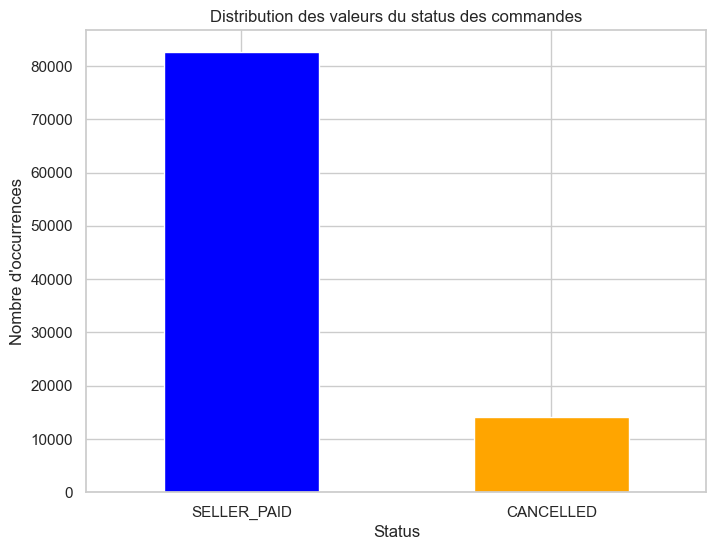

In [265]:
data = order['status']

value_counts = data.value_counts()

# Création du bar plot
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution des valeurs du status des commandes')
plt.xlabel('Status')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=0)
plt.show()


In [266]:
#Répartition du status des commandes
commandes_payees = order[order['status'] == 'SELLER_PAID']
commandes_annulés = order[order['status'] == 'CANCELLED']

Calcul du montant total des achats confirmés pour chaque client avec tri descendant

In [267]:
#afin de calculer correctement le montant total des achats il faut ajouter la condition 'status'=='SELLER_PAID'
Mnt_total_acheté= commandes_payees.groupby('buyerId')['amount'].sum().sort_values(ascending=False)
Mnt_total_acheté.head()

buyerId
de3eCL6Zo6c5dyvA8DuUxlb1byL2    5189.96
ZXgK4Yz783gobtRt2DSuBP47Dnm2    2039.60
gViNiPLN3whMjpxxPQtkSU4HW9j2    1763.12
FCp6t2GsNSaxVsWB0kgAylDUWDP2    1583.47
znMxL0tjPBPWE9mSGrWDPVaQM2W2    1571.01
Name: amount, dtype: float64

Calcul du nombre total des produits choisis et achetés par chaque client avec tri descendant 

In [268]:
#Fairee la jointure avec la table product
merged_order_produit=pd.merge(order,product, on='orderId',how= 'left')
#Calcul du nombre total de produits par acheteur
nb_produits=merged_order_produit[merged_order_produit['status']=='SELLER_PAID'].groupby('buyerId')['productId'].count().sort_values(ascending=False)
nb_produits.head()

buyerId
6nO4Jc2j9gRak3PZoJT7jHB9Wc42    518
znMxL0tjPBPWE9mSGrWDPVaQM2W2    280
FCp6t2GsNSaxVsWB0kgAylDUWDP2    238
YxscTpy3fIOwYPPVlXpDRHjaoRa2    196
nKlyzpLK9YaHq8vNCgpYeNC1nYP2    173
Name: productId, dtype: int64

Calcul du nombre total des commandes passées de chaque acheteur

In [269]:
nb_commandes=commandes_payees.groupby('buyerId')['orderId'].count().sort_values(ascending=False)
nb_commandes.head()

buyerId
gY08DkaLG6TL3y41jUvE7Gwl2H32    73
SU0YOJOvXyWRk1QVllIfYkW1OSt1    70
rk3tyebTEaSY1Zt7CvoK4DKNmGp1    70
ZXgK4Yz783gobtRt2DSuBP47Dnm2    68
FCp6t2GsNSaxVsWB0kgAylDUWDP2    64
Name: orderId, dtype: int64

Moyenne du montant de la commande par client

In [270]:
moy_commande= Mnt_total_acheté/nb_commandes
moy_commande=moy_commande.sort_values(ascending=False)
moy_commande.describe()

count    37001.000000
mean        32.989193
std         23.676792
min          1.000000
25%         18.300000
50%         27.000000
75%         42.000000
max        570.000000
dtype: float64

Calcul du nombre total de coupons utilisés par acheteur 

In [271]:
merged_order=pd.merge(merged_order_produit,coupon, on='orderId',how='left')
nb_coupons=merged_order[merged_order['status']=='SELLER_PAID'].groupby('buyerId')['couponUsed'].sum().sort_values(ascending=False)
nb_coupons.head()

buyerId
6nO4Jc2j9gRak3PZoJT7jHB9Wc42    366.0
nKlyzpLK9YaHq8vNCgpYeNC1nYP2    101.0
yQUv64QLbVY1Inj02QH8a3WoPbJ3     68.0
AtJCo8GB7ebr7IXJLIVrzvUCNn12     63.0
k8mH2UZUUTbrbUPwkdDdafNOap23     61.0
Name: couponUsed, dtype: float64

Visualisation des top 10 catégories de produits les plus vendues 

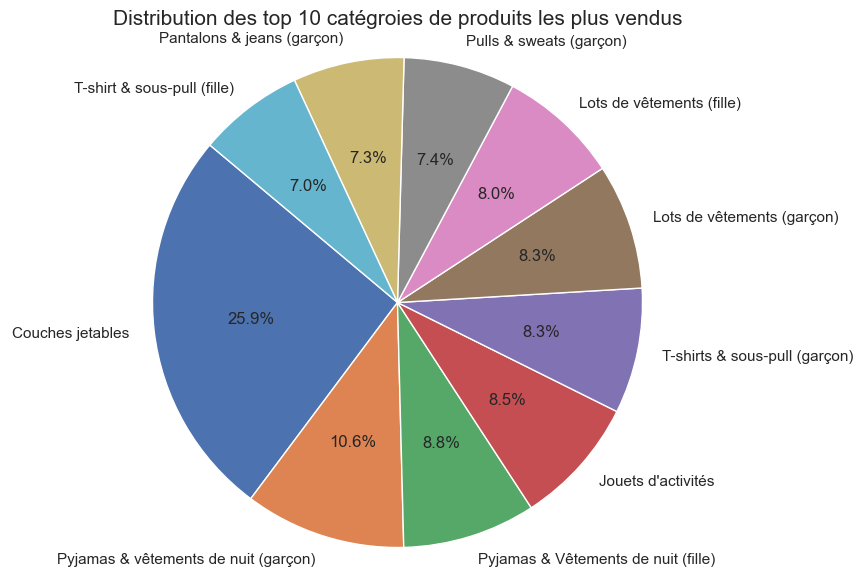

In [272]:
nb_best_seller = merged_order[merged_order['status'] == 'SELLER_PAID'] \
    .groupby('category')['productId'].count().sort_values(ascending=False)
    
top_10_categories = nb_best_seller.head(10)
# Représentation des ratios en a pie chart
plt.figure(figsize=(10, 7))
plt.pie(top_10_categories, labels=top_10_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution des top 10 catégroies de produits les plus vendus',size=15)
plt.axis('equal') 
plt.show()

Création d'une dataframe qui regroupe les quatre critères calculés 

In [273]:
Top_criteres=pd.concat([Mnt_total_acheté,nb_commandes,moy_commande,nb_produits,nb_coupons],axis=1)
Top_criteres.head()
#Renommer les colonnes
Top_criteres.columns=['Montant total d\'achat','Nombre de commandes','Moyenne de la commande','Nombre de produits','Nombre de coupons utilisé']
Top_criteres.head()

,Montant total d'achat,Nombre de commandes,Moyenne de la commande,Nombre de produits,Nombre de coupons utilisé
buyerId,,,,,
de3eCL6Zo6c5dyvA8DuUxlb1byL2,5189.96,23,225.650435,30,0.0
ZXgK4Yz783gobtRt2DSuBP47Dnm2,2039.60,68,29.994118,105,22.0
gViNiPLN3whMjpxxPQtkSU4HW9j2,1763.12,61,28.903607,131,27.0
FCp6t2GsNSaxVsWB0kgAylDUWDP2,1583.47,64,24.741719,238,48.0
znMxL0tjPBPWE9mSGrWDPVaQM2W2,1571.01,60,26.183500,280,44.0


In [274]:
Top_criteres.describe()

,Montant total d'achat,Nombre de commandes,Moyenne de la commande,Nombre de produits,Nombre de coupons utilisé
count,37001.000000,37001.000000,37001.000000,37001.000000,37001.000000
mean,65.460414,2.232399,32.989193,4.002567,1.062431
std,80.265953,2.904901,23.676792,8.029689,3.467750
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,24.000000,1.000000,18.300000,1.000000,0.000000
50%,43.900000,1.000000,27.000000,2.000000,0.000000
75%,77.000000,2.000000,42.000000,4.000000,1.000000
max,5189.960000,73.000000,570.000000,518.000000,366.000000


Création des box plots pour voir la dispersion de la data pour chaque critère calculé

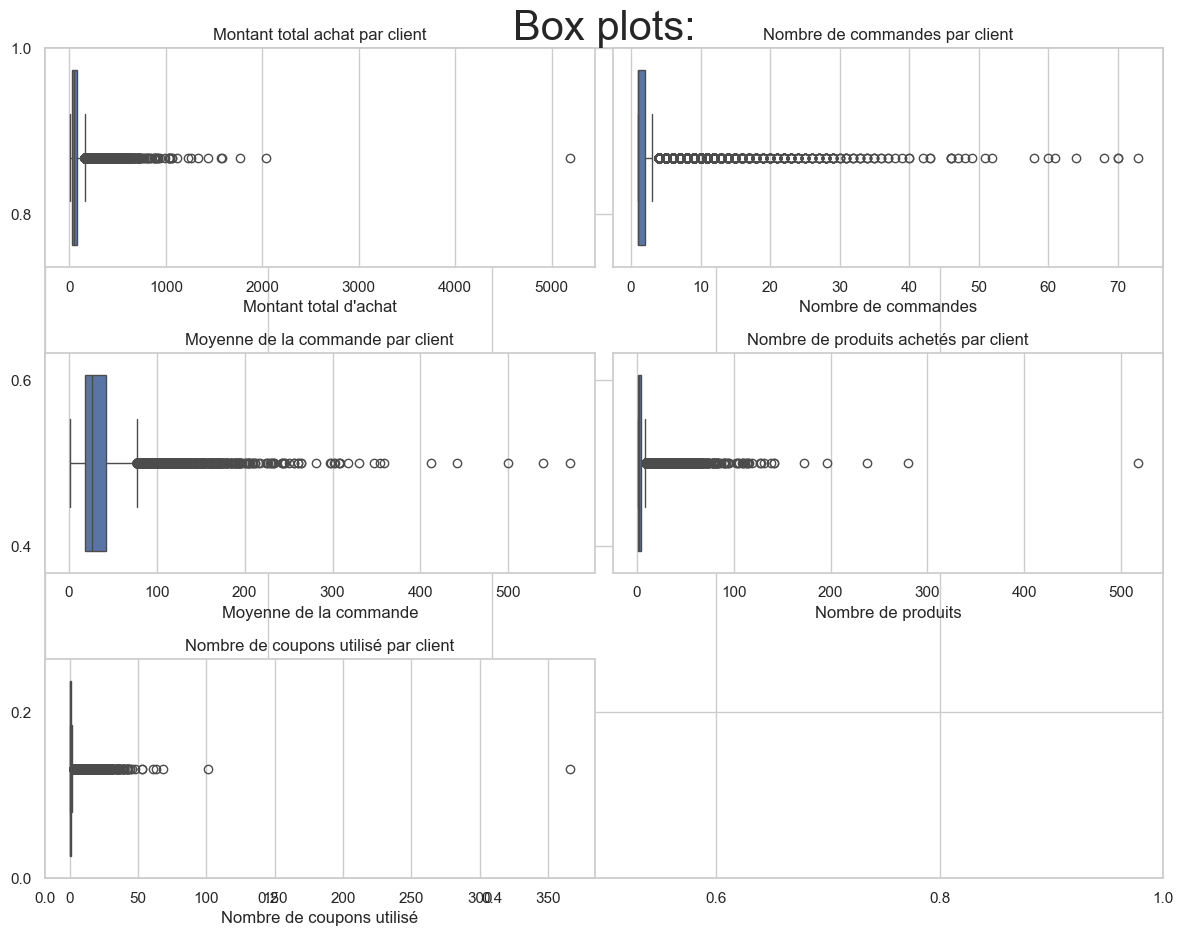

In [275]:
# Création des box plots avec seaborn
plt.figure(figsize=(12, 10))
plt.title('Box plots:',size=30)

# Box plot pour Montant total achat
plt.subplot(3, 2, 1)
sns.boxplot(x=Top_criteres['Montant total d\'achat'])
plt.title('Montant total achat par client')

# Box plot pour Nombre de commandes
plt.subplot(3, 2, 2)
sns.boxplot(x=Top_criteres['Nombre de commandes'])
plt.title('Nombre de commandes par client')

# Box plot de la moyenne des commandes
plt.subplot(3, 2, 3)
sns.boxplot(x=Top_criteres['Moyenne de la commande'])
plt.title('Moyenne de la commande par client')

# Box plot pour Nombre de produits
plt.subplot(3, 2, 4)
sns.boxplot(x=Top_criteres['Nombre de produits'])
plt.title('Nombre de produits achetés par client')

# Box plot pour Nombre de coupons
plt.subplot(3, 2, 5)
sns.boxplot(x=Top_criteres['Nombre de coupons utilisé'])
plt.title('Nombre de coupons utilisé par client')

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

Voir s'il y'a des corrélations entre les différents critères pour savoir un peu plus sur les tendances des clients

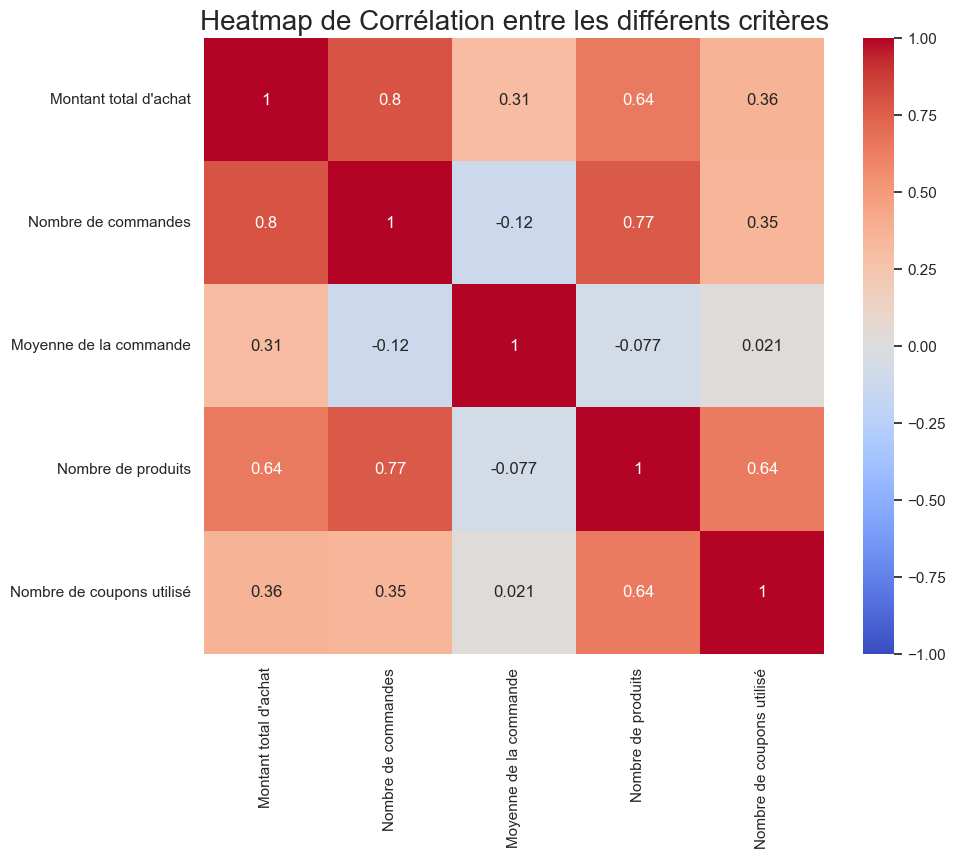

In [276]:
# Création de la matrice de corrélation
correlation_matrix = Top_criteres.corr()

# Création de la heatmap avec seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap de Corrélation entre les différents critères',size=20)
plt.show()

Visualisation des nuages de points entre le nombre de commandes et le montant total achat par client

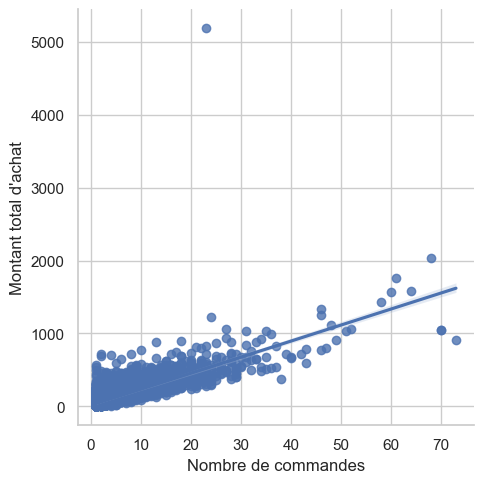

In [277]:
sns.lmplot(x='Nombre de commandes',y='Montant total d\'achat',data=Top_criteres)

Visualisation des nuages de points entre la moyenne de la commande et le montant total dépensé

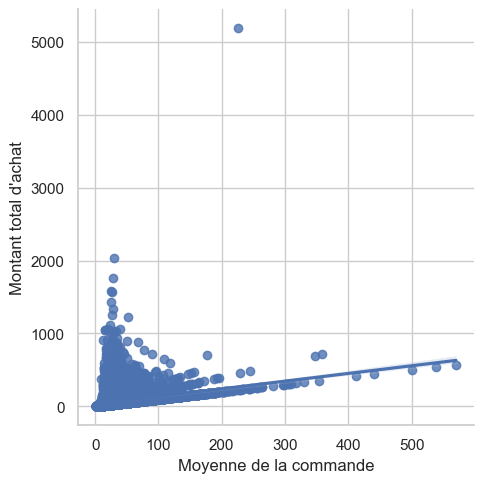

In [278]:
sns.lmplot(x='Moyenne de la commande',y='Montant total d\'achat',data=Top_criteres)

Visualisation des nuages de points entre le nombre de produits et le nombre de commandes par client

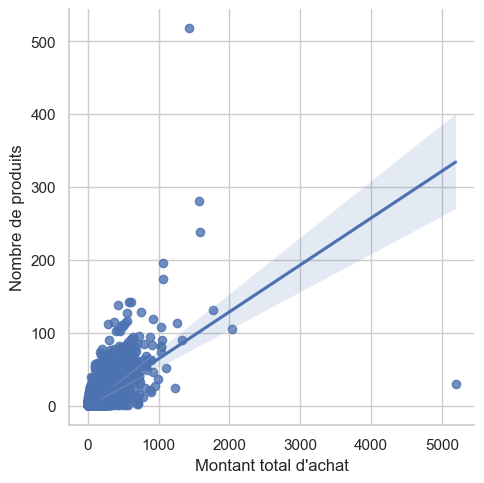

In [279]:
sns.lmplot(x='Montant total d\'achat',y='Nombre de produits',data=Top_criteres)

Ilustration des nuages de points entre le nombre de coupons et le montant total d'achat par client

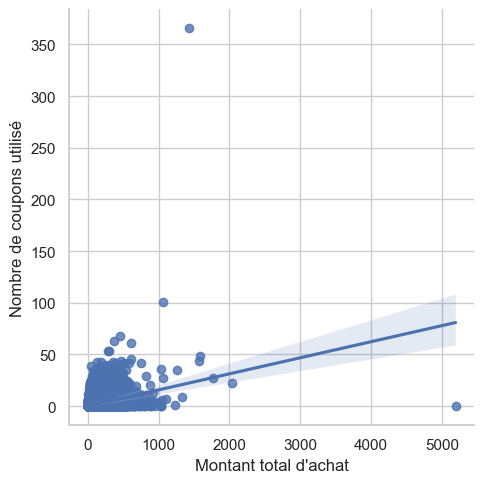

In [280]:
sns.lmplot(x='Montant total d\'achat',y='Nombre de coupons utilisé',data=Top_criteres)

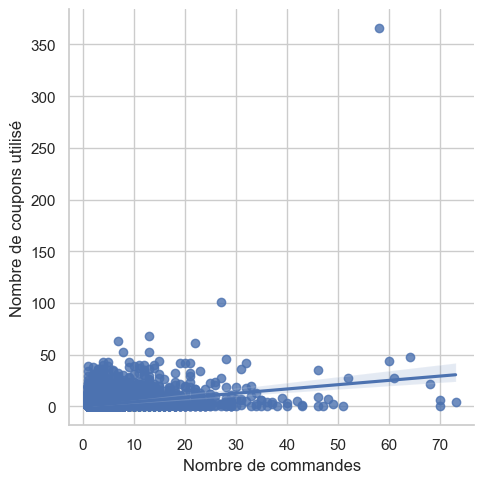

In [281]:
sns.lmplot(x='Nombre de commandes',y='Nombre de coupons utilisé' ,data=Top_criteres)

## Distinction des top acheteurs avec le calcul du score RFM pondéré

Calcul de la récence des commandes effectuées regroupé par client

In [282]:
max_date=commandes_payees.groupby('buyerId')['createdAt'].max()
recence=(pd.to_datetime('today') - max_date).dt.days
recence=recence.sort_values(ascending=True)
print(recence)

buyerId
56u7ZMU3s1X37GzwX4GXpjeGvo03    626
JKakcrSff0SS3xJaBC0SyNdbFjL2    626
W1DcqM13lgatQIWrnopLAfr4ps12    626
W1Bs6e6TaPOe0Gfqyk8ZO836hZ12    626
wjl05mRmnRYtPBq2nUIt2yPnXFF2    626
                               ... 
UNyv7wyqkPb9Ic2WixP9JvbtFCw1    748
BJRadTWOnudSzJN7gzGIiN4dsrx1    749
ahk4DuYxP0WJcTAAwm7IdQmAAv03    749
E6RXNgSXZ9M2VJIb55iNyOKC6M63    749
juwVwyfI1tav6uSGtU4cmOXzKaE2    749
Name: createdAt, Length: 37001, dtype: int64


Attribution de classment aux différents critères choisis

In [283]:
df1=pd.merge(Mnt_total_acheté,nb_commandes,how='outer',on='buyerId')
df2=pd.merge(df1,recence,how='outer',on='buyerId')
metrics=pd.merge(df2,nb_produits,how='outer',on='buyerId').reset_index()

metrics.describe()

,amount,orderId,createdAt,productId
count,37001.000000,37001.000000,37001.000000,37001.000000
mean,65.460414,2.232399,670.689576,4.002567
std,80.265953,2.904901,32.860475,8.029689
min,1.000000,1.000000,626.000000,1.000000
25%,24.000000,1.000000,644.000000,1.000000
50%,43.900000,1.000000,662.000000,2.000000
75%,77.000000,2.000000,692.000000,4.000000
max,5189.960000,73.000000,749.000000,518.000000


Calcul du RFM score et classification du top 5% de clients 

In [284]:
# Calculer les rangs pour chaque colonne

metrics['classement_depense'] = metrics['amount'].rank(ascending=False)
metrics['classement_frequence'] = metrics['orderId'].rank(ascending=False)
metrics['classement_recence'] = metrics['createdAt'].rank(ascending=False)
metrics['classement_produits'] = metrics['productId'].rank(ascending=False)

# Afficher le DataFrame avec uniquement les rangs
metrics.describe()


,amount,orderId,createdAt,productId,classement_depense,classement_frequence,classement_recence,classement_produits
count,37001.000000,37001.000000,37001.000000,37001.000000,37001.000000,37001.000000,37001.000000,37001.000000
mean,65.460414,2.232399,670.689576,4.002567,18501.000000,18501.000000,18501.000000,18501.000000
std,80.265953,2.904901,32.860475,8.029689,10681.133907,9461.683851,10680.639122,10034.628259
min,1.000000,1.000000,626.000000,1.000000,1.000000,1.000000,2.500000,1.000000
25%,24.000000,1.000000,644.000000,1.000000,9284.000000,11769.000000,9219.000000,8811.000000
50%,43.900000,1.000000,662.000000,2.000000,18501.500000,26021.500000,18652.500000,16136.000000
75%,77.000000,2.000000,692.000000,4.000000,27986.000000,26021.500000,27784.500000,28081.000000
max,5189.960000,73.000000,749.000000,518.000000,36992.000000,26021.500000,36735.000000,28081.000000


In [285]:
# Calculate the weighted RFM score
metrics['rfm_score'] = (
    metrics['classement_depense'] * 0.4 +
    metrics['classement_frequence'] * 0.3 +
    metrics['classement_recence'] * 0.2 +
    metrics['classement_produits'] * 0.1
)
metrics['moy_commande']=metrics['amount']/metrics['orderId']

metrics = metrics.reindex(columns=['amount','orderId','moy_commande','createdAt','productId',\
                                    'classement_depense','classement_frequence',\
                                    'classement_recence','classement_produits','rfm_score'])
# Sort the DataFrame by RFM score in descending order
df_sorted = metrics.sort_values(by='rfm_score', ascending=True)

# Calculer le seuil pour le top 10% des RFM scores
top_10_percent_threshold = metrics['rfm_score'].quantile(0.1)

# Sélectionner le top 10% des clients
top_10_percent = metrics[metrics['rfm_score'] <= top_10_percent_threshold]

top_10_percent.describe()

,amount,orderId,moy_commande,createdAt,productId,classement_depense,classement_frequence,classement_recence,classement_produits,rfm_score
count,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000
mean,211.905471,7.767630,32.127398,663.192921,16.395839,3048.851797,3087.326533,20709.190354,4117.824102,6699.359160
std,163.839621,6.245131,18.712431,28.055227,19.374636,2600.575876,2834.423696,9876.377412,3803.412380,1318.917139
min,54.500000,2.000000,9.842105,626.000000,2.000000,1.000000,1.000000,241.500000,1.000000,1023.950000
25%,123.600000,4.000000,20.850000,642.000000,6.000000,1010.000000,1031.000000,12560.500000,1062.500000,5946.750000
50%,175.000000,6.000000,27.133333,656.000000,11.000000,2316.500000,2228.500000,21511.500000,2804.500000,6991.350000
75%,250.500000,9.000000,37.600000,681.000000,21.000000,4469.000000,4463.000000,28804.500000,5783.500000,7720.200000
max,5189.960000,73.000000,358.000000,747.000000,518.000000,14322.000000,11769.000000,36735.000000,16136.000000,8439.100000


Visualization des différentes distributions des différentes métriques décrivant le comportement des top 10% des clients

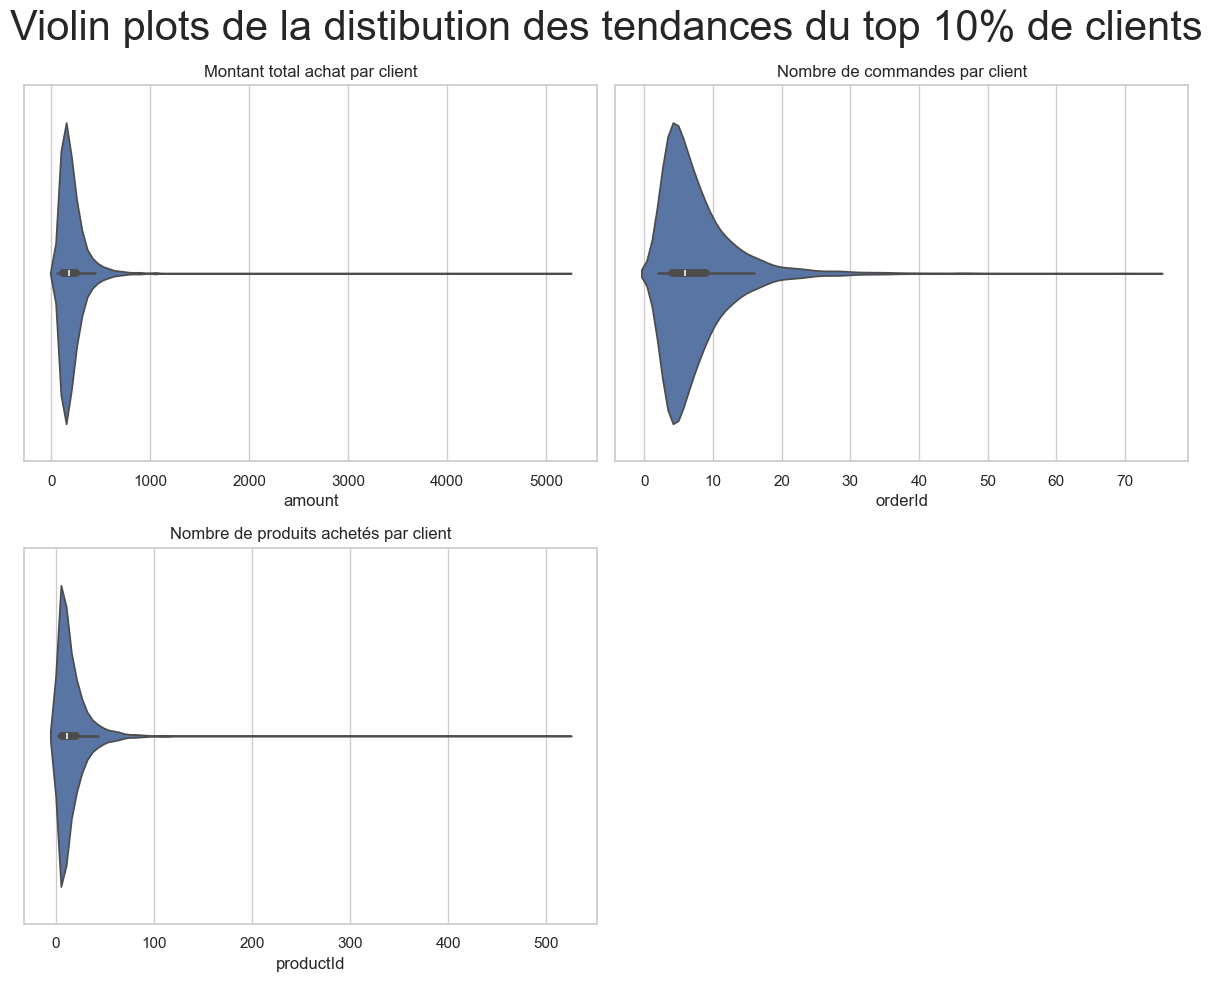

In [292]:
# Création des violin plots avec seaborn
plt.figure(figsize=(12, 10))
plt.suptitle('Violin plots de la distibution des tendances du top 10% de clients', size=30)

# Violin plot pour Montant total achat
plt.subplot(2, 2, 1)
sns.violinplot(x=top_10_percent['amount'])
plt.title('Montant total achat par client')

# Violin plot pour Nombre de commandes
plt.subplot(2, 2, 2)
sns.violinplot(x=top_10_percent['orderId'])
plt.title('Nombre de commandes par client')

# Violin plot pour Nombre de produits
plt.subplot(2, 2, 3)
sns.violinplot(x=top_10_percent['productId'])
plt.title('Nombre de produits achetés par client')

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les plots
plt.show()

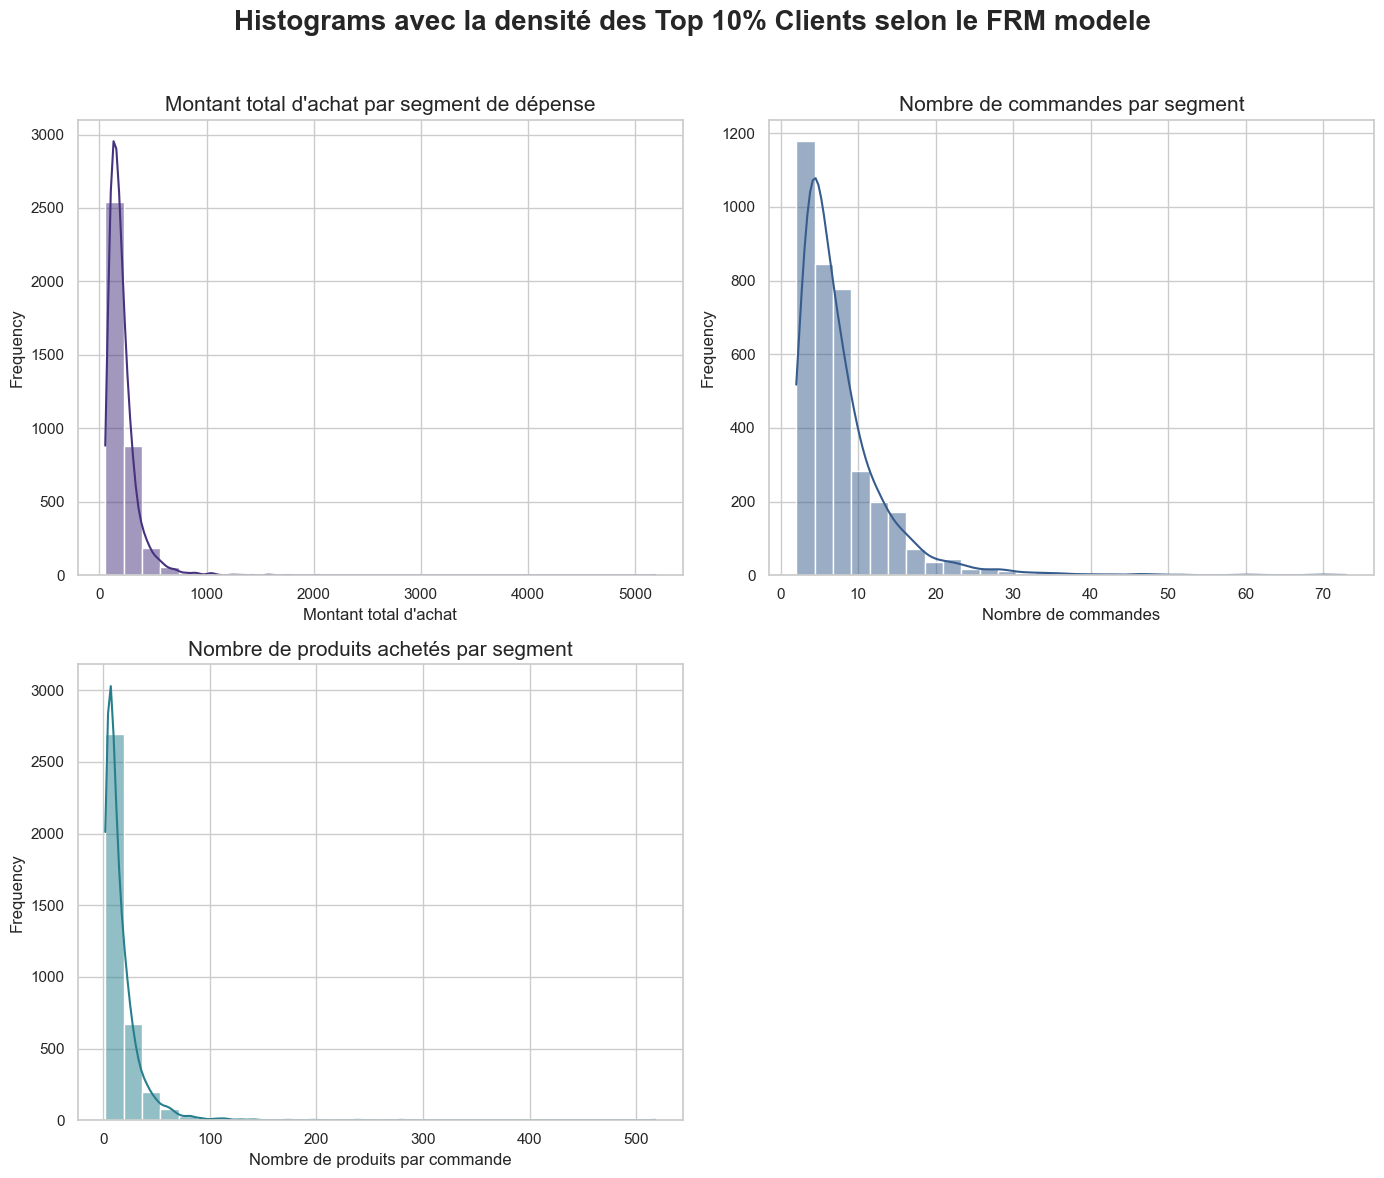

In [290]:
palette = sns.color_palette("viridis")

# Création des histogrammes avec seaborn
plt.figure(figsize=(14, 12))
plt.suptitle('Histograms avec la densité des Top 10% Clients selon le FRM modele', size=20, weight='bold')

# Histogramme pour le montant total d'achat
plt.subplot(2, 2, 1)
sns.histplot(top_10_percent['amount'], kde=True, color=palette[0], bins=30)
plt.title('Montant total d\'achat par segment de dépense', size=15)
plt.xlabel('Montant total d\'achat', size=12)
plt.ylabel('Frequency', size=12)

# Histogramme pour Nombre de commandes
plt.subplot(2, 2, 2)
sns.histplot(top_10_percent['orderId'], kde=True, color=palette[1], bins=30)
plt.title('Nombre de commandes par segment', size=15)
plt.xlabel('Nombre de commandes', size=12)
plt.ylabel('Frequency', size=12)

# Histogramme pour Nombre de produits
plt.subplot(2, 2, 3)
sns.histplot(top_10_percent['productId'], kde=True, color=palette[2], bins=30)
plt.title('Nombre de produits achetés par segment', size=15)
plt.xlabel('Nombre de produits par commande', size=12)
plt.ylabel('Frequency', size=12)

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Afficher les plots
plt.show()